#**Learning Agent**

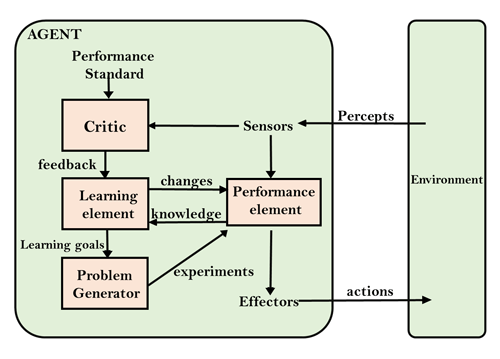

In [ ]:
import random

class LearningBasedAgent:
    def __init__(self, actions):
        self.Q = {}
        self.actions = actions
        self.alpha = 0.1  # Learning rate
        self.gamma = 0.9  # Discount factor
        self.epsilon = 0.1  # Exploration rate

    def get_Q_value(self, state, action):
        return self.Q.get((state, action), 0.0)

    # def select_action(self, state):
    #     if random.uniform(0, 1) < self.epsilon:
    #         return random.choice(self.actions)
    #     else:
    #         return max(self.actions, key=lambda a: self.get_Q_value(state, a))

    def learn(self, state, action, reward, next_state):
        old_Q = self.get_Q_value(state, action)
        best_future_Q = max([self.get_Q_value(next_state, a) for a in self.actions])
        self.Q[(state, action)] = old_Q + self.alpha * (reward + self.gamma * best_future_Q - old_Q)

    def act(self, state):
        action = self.select_action(state)
        return action

class Environment:
    def __init__(self, state='Dirty'):
        self.state = state

    def get_percept(self):
        return self.state

    def clean_room(self):
        self.state = 'Clean'
        return 10

    def no_action_reward(self):
        return 0

def run_agent(agent, environment, steps):
    for step in range(steps):
        percept = environment.get_percept()
        action = agent.act(percept)
        if percept == 'Dirty':
            reward = environment.clean_room()
            print(f"Step {step + 1}: Percept - {percept}, Action - {action}, Reward - {reward}")
        else:
            reward = environment.no_action_reward()
            print(f"Step {step + 1}: Percept - {percept}, Action - {action}, Reward - {reward}")
        next_percept = environment.get_percept()
        agent.learn(percept, action, reward, next_percept)


# Create instances of agent and environment
agent = LearningBasedAgent(['Clean the room', 'No action needed'])
environment = Environment()

# Run the agent in the environment for 5 steps
run_agent(agent, environment, 5)
